In [1]:
# 1，torch 与 numpy相互转化: pytorch可以看作支持GPU和适应深度学习模型梯度计算的numpy，升级版的numpy
import torch
import numpy as np
from torch.autograd import Variable


torch_tensor = torch.randn(3,5)
np_tensor = np.random.randn(2,3)

np_to_torch_tensor = torch.from_numpy(np_tensor)             # numpy to pytorch.
torch_to_np_tensor = torch_tensor.numpy()                    # pytorch to numpy.
print(np_to_torch_tensor, '\n','\n', torch_to_np_tensor)

# 梯度计算：
x = Variable(torch.FloatTensor([2]), requires_grad=True)  # 一维变量求导数(梯度)
z = (x + 2)**2
z.backward()
print(x.grad)       # the grad of z on x.

x = Variable(torch.randn(3,6), requires_grad=True)        # 二维变量求导数(雅可比矩阵)
y = Variable(torch.randn(3,2), requires_grad=True)
w = Variable(torch.randn(6,2), requires_grad=True)

z = torch.mean(y - torch.matmul(x, w))
z.backward()

print(x.grad, '\n','***','\n', y.grad, '\n','***','\n', w.grad)

tensor([[ 0.7749,  0.4905,  0.6137],
        [-0.1169,  0.1252, -0.0083]], dtype=torch.float64) 
 
 [[ 1.363478   -1.3787154  -0.57904965 -1.9406884   0.05370565]
 [ 1.9636201  -1.5404222   1.2954143  -0.36350814  0.85704774]
 [ 0.12455699  0.06134478  0.11797304 -0.43239707  0.50004965]]
tensor([8.])
tensor([[-0.0731, -0.0887, -0.4003,  0.1503,  0.3661, -0.1121],
        [-0.0731, -0.0887, -0.4003,  0.1503,  0.3661, -0.1121],
        [-0.0731, -0.0887, -0.4003,  0.1503,  0.3661, -0.1121]]) 
 *** 
 tensor([[0.1667, 0.1667],
        [0.1667, 0.1667],
        [0.1667, 0.1667]]) 
 *** 
 tensor([[ 0.1102,  0.1102],
        [-0.1400, -0.1400],
        [ 0.0065,  0.0065],
        [ 0.1613,  0.1613],
        [ 0.0785,  0.0785],
        [-0.1553, -0.1553]])


epoch: 0, loss: 1.2777559757232666
epoch: 1, loss: 0.23446236550807953
epoch: 2, loss: 0.21228225529193878
epoch: 3, loss: 0.21166886389255524
epoch: 4, loss: 0.21151168644428253
epoch: 5, loss: 0.21136493980884552
epoch: 6, loss: 0.21121908724308014
epoch: 7, loss: 0.21107405424118042
epoch: 8, loss: 0.2109297215938568
epoch: 9, loss: 0.21078616380691528
epoch: 10, loss: 0.21064333617687225
epoch: 11, loss: 0.21050123870372772
epoch: 12, loss: 0.21035988628864288
epoch: 13, loss: 0.21021929383277893
epoch: 14, loss: 0.2100793570280075
epoch: 15, loss: 0.20994016528129578
epoch: 16, loss: 0.20980171859264374
epoch: 17, loss: 0.20966394245624542
epoch: 18, loss: 0.2095268815755844
epoch: 19, loss: 0.2093905806541443
epoch: 20, loss: 0.20925498008728027
epoch: 21, loss: 0.2091200351715088
epoch: 22, loss: 0.2089858055114746
epoch: 23, loss: 0.20885224640369415
epoch: 24, loss: 0.20871946215629578
epoch: 25, loss: 0.20858722925186157
epoch: 26, loss: 0.20845580101013184
epoch: 27, loss: 0

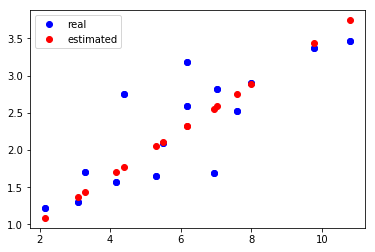

In [2]:
# 2，torch进行梯度优化一个线性模型：
import torch
import numpy as np
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline
torch.manual_seed(2018)

x_train = np.array([[3.3],[4.4],[5.5],[6.17],[6.93],[4.168],[9.779],[6.182],[7.59],[2.167],[7.042],[10.791],
                    [5.313],[7.997],[3.1]],dtype=np.float32)
y_train = np.array([[1.7],[2.76],[2.09],[3.19],[1.694],[1.573],[3.366],[2.596],[2.53],[1.221],[2.827],
                   [3.465],[1.65],[2.904],[1.3]],dtype=np.float32)

plt.plot(x_train, y_train, 'bo')

# numpy转化为torch，以便梯度优化线性模型：
pt_x_train = torch.from_numpy(x_train)
pt_y_train = torch.from_numpy(y_train)

w = Variable(torch.randn(1), requires_grad=True)
b = Variable(torch.randn(1), requires_grad=True)

x = Variable(pt_x_train)
y = Variable(pt_y_train)

def linear_model(x):  # 定义线性模型
    return x * w + b

y_hat = linear_model(x)

# plt.plot(x.data.numpy(), y.data.numpy(), 'bo', label='real')
# plt.plot(x.data.numpy(), y_hat.data.numpy(), 'ro', label='estimated')
# plt.legend()

def get_loss(y_hat, y):  # 定义损失函数，梯度优化的目标是最小化损失函数
    return torch.mean((y_hat - y) ** 2)

loss = get_loss(y_hat, y)

loss.backward()
w.data = w.data - 1e-2 * w.grad.data  # 梯度优化，进行参数更新
b.data = b.data - 1e-2 * b.grad.data

# y_hat = linear_model(x)
# plt.plot(x.data.numpy(), y.data.numpy(), 'bo', label='real')
# plt.plot(x.data.numpy(), y_hat.data.numpy(), 'ro', label='estimated')
# plt.legend()

for e in range(100):  # 参数更新100次
    y_hat = linear_model(x)
    loss = get_loss(y_hat, y)
    
    w.grad.zero_()
    b.grad.zero_()
    loss.backward()
    
    w.data = w.data - 1e-2 * w.grad.data
    b.data = b.data - 1e-2 * b.grad.data 
    print('epoch: {}, loss: {}'.format(e, loss.item()))
    
y_hat = linear_model(x)  # 画图查看拟合效果
plt.plot(x.data.numpy(), y.data.numpy(), 'bo', label='real')
plt.plot(x.data.numpy(), y_hat.data.numpy(), 'ro', label='estimated')
plt.legend()

In [3]:
# 3，手写体识别数据集运行一个深度模型：
from torchvision.datasets import mnist
from torch import nn
from torch.utils.data import DataLoader
mnist.MNIST

def data_tf(x):   # 数据归一化
    x = np.array(x, dtype='float32') / 255
    x = (x - 0.5) / 0.5
    x = x.reshape((-1,))
    x = torch.from_numpy(x)
    return x

train_set = mnist.MNIST('../DataSets', train=True, transform=data_tf, download=True)   # 加载数据
test_set = mnist.MNIST('../DataSets', train=False, transform=data_tf, download=True)

train_data = DataLoader(train_set, batch_size=64, shuffle=True)
test_data = DataLoader(test_set,batch_size=128, shuffle=False)

net = nn.Sequential(       # 定义一个四层的深度学习网络
    nn.Linear(784, 400),
    nn.ReLU(),
    nn.Linear(400, 200),
    nn.ReLU(),
    nn.Linear(200, 100),
    nn.ReLU(),
    nn.Linear(100, 10)
)

# 开始训练模型：
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), 1e-1)

losses = []
acces = []
eval_losses = []
eval_acces = []

for e in range(30):
    train_loss = 0
    train_acc = 0
    net.train()
    for im, label in train_data:
        im = Variable(im)
        label = Variable(label)
        
        out = net(im)
        loss = criterion(out, label)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
        
        _,pred = out.max(1)
        num_correct = (pred == label).sum().item()
        acc = num_correct / im.shape[0]
        train_acc += acc
        
    losses.append(train_loss / len(train_data))
    acces.append(train_acc / len(train_data))
    
    eval_loss = 0
    eval_acc = 0
    net.eval()
    for im, label in test_data:
        im = Variable(im)
        label = Variable(label)
        
        out = net(im)
        loss = criterion(out, label)
        
        eval_loss += loss.item()
        
        _, pred = out.max(1)
        num_correct = (pred == label).sum().item()
        acc = num_correct / im.shape[0]
        eval_acc += acc
        
    eval_losses.append(eval_loss / len(test_data))
    eval_acces.append(eval_acc / len(test_data))
    print('epoch: {}, Train Loss: {:.6f}, Train Acc: {:.6f}, Eval Loss: {:.6f}, Eval Acc: {:.6F}'
          .format(e, train_loss / len(train_data), train_acc / len(train_data),
                     eval_loss / len(test_data), eval_acc / len(test_data)))

100.1%

Extracting DataSets/MNIST/raw/train-images-idx3-ubyte.gz


113.5%

Extracting DataSets/MNIST/raw/train-labels-idx1-ubyte.gz


100.4%

Extracting DataSets/MNIST/raw/t10k-images-idx3-ubyte.gz


180.4%

Extracting DataSets/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!
epoch: 0, Train Loss: 0.515413, Train Acc: 0.833206, Eval Loss: 0.201316, Eval Acc: 0.936511
epoch: 1, Train Loss: 0.168810, Train Acc: 0.946778, Eval Loss: 0.132500, Eval Acc: 0.960542
epoch: 2, Train Loss: 0.117487, Train Acc: 0.962970, Eval Loss: 0.142787, Eval Acc: 0.954509
epoch: 3, Train Loss: 0.091664, Train Acc: 0.970616, Eval Loss: 0.492202, Eval Acc: 0.857496
epoch: 4, Train Loss: 0.073679, Train Acc: 0.976513, Eval Loss: 0.074378, Eval Acc: 0.974782
epoch: 5, Train Loss: 0.062037, Train Acc: 0.980360, Eval Loss: 0.113306, Eval Acc: 0.962915
epoch: 6, Train Loss: 0.051442, Train Acc: 0.983376, Eval Loss: 0.074486, Eval Acc: 0.976859
epoch: 7, Train Loss: 0.042751, Train Acc: 0.986074, Eval Loss: 0.075453, Eval Acc: 0.975574
epoch: 8, Train Loss: 0.038706, Train Acc: 0.987290, Eval Loss: 0.072430, Eval Acc: 0.978837
epoch: 9, Train Loss: 0.036807, Train Acc: 0.988323, Eval Loss: 0.063955, Eval Acc: 0.9

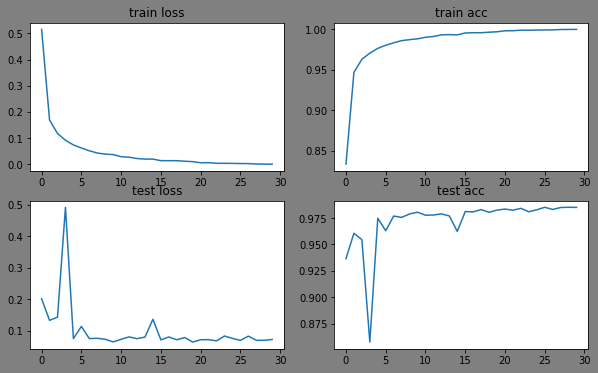

In [4]:
# 画图：
fig = plt.figure(figsize=(10,6), facecolor = 'gray')

ax1 = fig.add_subplot(2,2,1)
plt.title('train loss')
plt.plot(np.arange(len(losses)),losses)

ax2 = fig.add_subplot(2,2,2)
plt.title('train acc')
plt.plot(np.arange(len(acces)),acces)

ax3 = fig.add_subplot(2,2,3)
plt.title('test loss')
plt.plot(np.arange(len(eval_losses)), eval_losses)

ax4 = fig.add_subplot(2,2,4)
plt.title('test acc')
plt.plot(np.arange(len(eval_acces)), eval_acces)